<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Clasificacion-Lineal/blob/main/2_Clasificacion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Como vimos en el apunte anterior, la clasificación lineal no es la mejor opción cuando trabajamos con indicadores de matrices que generan tablas con uno y ceros. En este caso, utilizaremos la regresión logística para ver si nos sirve para este propósito.

Para este apunte utilizaremos las siguientes librerías nuevas:

* **Scikit-Learn**: con el que armaremos un pequeño modelo de machine learning usando regresión logística.

In [17]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

Empezamos cargando nuestro data set y creando la matriz de indicadores con la función *get_dummies* que ya habíamos usado anteriormente.

In [2]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df = pd.get_dummies(data=df, columns=["species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


# Función Sigmoide

Una gran ventaja de trabajar con Seaborn es que podemos generar una función sigmoide con el módulo *lmplot*. El siguiente código es todo lo que necesitamos para este fin.

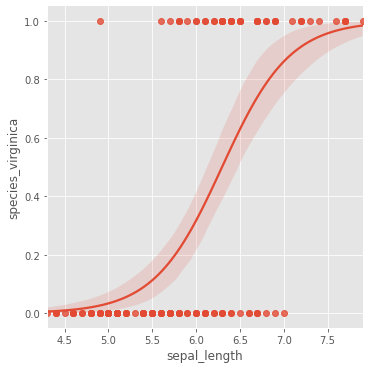

In [4]:
sns.lmplot(x="sepal_length", y="species_virginica", data=df, logistic=True)

Como podemos ver, con la función sigmoide podemos clasificar mejor nuestro modelo. Una gran ventaja de utilizar este tipo de módulos es que nos ayuda a encontrar la función de activación. Esto es: en que punto la función sigmoide sube para formar esa línea.

# Regresión Logística

Ahora, entrenaremos nuestro modelo usando el módulo *logistic regression* de *Scikit-Learn*. Como buena práctica, dividimos nuestro set en entrenamiento y pruebas. En este caso, nos enfocaremos a determinar si una flor es Virgínica o no. 

In [12]:
X = df["sepal_length"].values.reshape(-1,1)
y = df["species_virginica"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [13]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

Nuestro modelo, aunque simple, pudo determinar correctamente en 93% de los casos si la flore erá virgínica. Esto demuestra que modelos simples de machine learning puede ser útiles para solucionar problemas. Aunque, hay que recordar que los scores funcionan para determinar la precisión con el data set utilizado y no con el total de data points que pudieramos recolectar en un futuro.

Ahora, podemos analizar más a profundidad nuestro modelo con una matriz de confusión. Su propósito es determinar cuantos falsos positivos y negativos tuvimos. Si quieres saber más al respecto, no olvides checar [la documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [18]:
confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 1, 10]])

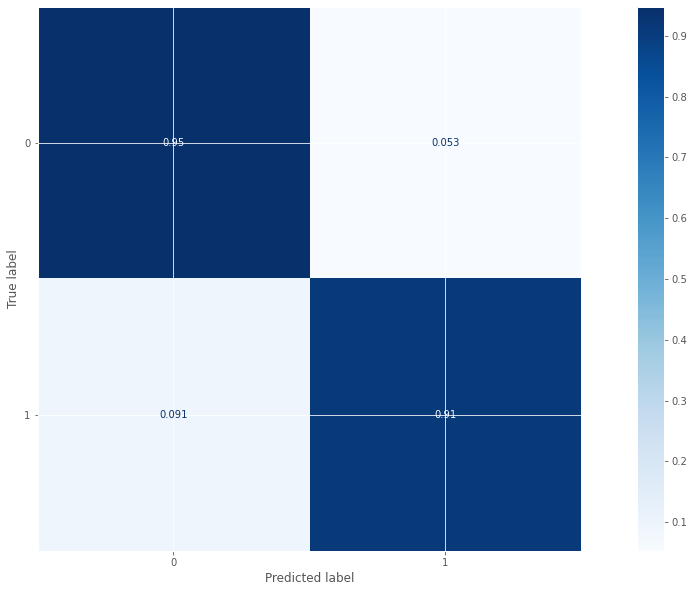

In [19]:
matriz = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show(matriz)
plt.show()

Al ver las matrices de confusión podemos ver que:

* Se analizaron 30 flores en total, de las cuales solo 28 se clasificaron bien y 2 se clasificaron como falsos negativos o positivos.
* En términos de porcentajes, esto significa arriba del 90% en verdadero positivo y negativo, por lo que esta clasificación es bastante buena.

En este caso, la clasificación logística nos ha servido para determinar si ciertas flores son virgínica o no. El problema es que tendríamos que hacer este proceso flor por flor. Sin embargo, podemos utilizar otras herramientas para clasificar todas las flores de golpe.